In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('data_extracted.csv')

In [3]:
data.shape

(266386, 34)

In [4]:
data.columns

Index(['name', 'collaborative', 'pid', 'modified_at', 'num_tracks',
       'num_albums', 'num_followers', 'num_edits', 'playlist_duration_ms',
       'num_artists', 'description', 'pos', 'artist_name', 'track_uri',
       'artist_uri', 'track_name', 'album_uri', 'track_duration_ms',
       'album_name', 'Name', 'Album', 'Artist', 'Release_date', 'Length',
       'Popularity', 'Acousticness', 'Danceability', 'Energy',
       'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Tempo',
       'Time_signature'],
      dtype='object')

In [5]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [6]:
data.head()

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,playlist_duration_ms,num_artists,description,pos,artist_name,track_uri,artist_uri,track_name,album_uri,track_duration_ms,album_name,Name,Album,Artist,Release_date,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_signature
0,Throwbacks,False,0,1493424000,52,47,1,6,11532414,37,NaN,0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,Lose Control (feat. Ciara & Fat Man Scoop),The Cookbook,Missy Elliott,2005-07-04,226863.0,67.0,0.03110,0.904,0.813,0.006970,0.0471,-7.105,0.1210,125.461,4.0
1,Throwbacks,False,0,1493424000,52,47,1,6,11532414,37,NaN,1,Britney Spears,6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone,Toxic,In The Zone,Britney Spears,2003-11-13,198800.0,81.0,0.02490,0.774,0.838,0.025000,0.2420,-3.914,0.1140,143.040,4.0
2,Throwbacks,False,0,1493424000,52,47,1,6,11532414,37,NaN,2,Beyoncé,0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit),Crazy In Love (feat. Jay-Z),Dangerously In Love (Alben für die Ewigkeit),Beyoncé,2003-06-23,235933.0,21.0,0.00238,0.664,0.758,0.000000,0.0598,-6.583,0.2100,99.259,4.0
3,Throwbacks,False,0,1493424000,52,47,1,6,11532414,37,NaN,3,Justin Timberlake,1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified,Rock Your Body,Justified,Justin Timberlake,2002-11-04,267266.0,76.0,0.20100,0.892,0.714,0.000234,0.0521,-6.055,0.1410,100.972,4.0
4,Throwbacks,False,0,1493424000,52,47,1,6,11532414,37,NaN,4,Shaggy,1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot,It Wasn't Me,Hot Shot (International Version #2),Shaggy,2000,227600.0,0.0,0.05610,0.853,0.606,0.000000,0.3130,-4.596,0.0713,94.759,4.0


In [7]:
data.drop(['name', 'collaborative', 'pid', 'modified_at', 'num_tracks',
       'num_albums', 'num_followers', 'num_edits', 'playlist_duration_ms',
       'num_artists', 'description', 'pos', 'artist_name', 'track_uri',
       'artist_uri', 'track_name', 'album_uri', 'track_duration_ms',
       'album_name', 'Name', 'Album', 'Artist'], axis =1, inplace = True)

In [8]:
data['Release_date'] = data['Release_date'].astype(str)
data['Release_date'] = pd.to_datetime(data['Release_date'], errors = 'coerce')
data['year'] = pd.DatetimeIndex(data['Release_date']).year
data['Age'] = 2022 - data['year']

In [9]:
data = data.dropna()

In [10]:
#data.to_csv('df_copy.csv')

In [11]:
df = pd.read_csv('df_copy.csv')

In [12]:
df.shape

(266298, 13)

In [13]:
df.head()

,Unnamed: 0,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_signature,Age
0,0,226.86,67.0,0.03110,0.904,0.813,0.006970,0.0471,-7.105,0.1210,125.461,4.0,17.0
1,1,198.80,81.0,0.02490,0.774,0.838,0.025000,0.2420,-3.914,0.1140,143.040,4.0,19.0
2,2,235.93,21.0,0.00238,0.664,0.758,0.000000,0.0598,-6.583,0.2100,99.259,4.0,19.0
3,3,267.27,76.0,0.20100,0.892,0.714,0.000234,0.0521,-6.055,0.1410,100.972,4.0,20.0
4,4,227.60,0.0,0.05610,0.853,0.606,0.000000,0.3130,-4.596,0.0713,94.759,4.0,22.0


In [14]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [15]:
scaler = StandardScaler().fit(df)
df_scaled = scaler.transform(df)
print(type(df_scaled))
df_scaled[:5,:5]

<class 'numpy.ndarray'>


array([[-0.09985763,  1.07953639, -0.72774567,  1.86958936,  0.7953907 ],
       [-0.48125878,  1.56240917, -0.75040823,  1.05386523,  0.91542612],
       [ 0.02342492, -0.50704562, -0.83272451,  0.36363713,  0.53131279],
       [ 0.44940895,  1.38995461, -0.10671837,  1.79429175,  0.32005046],
       [-0.0897993 , -1.23135479, -0.63636437,  1.54957451, -0.19850253]])

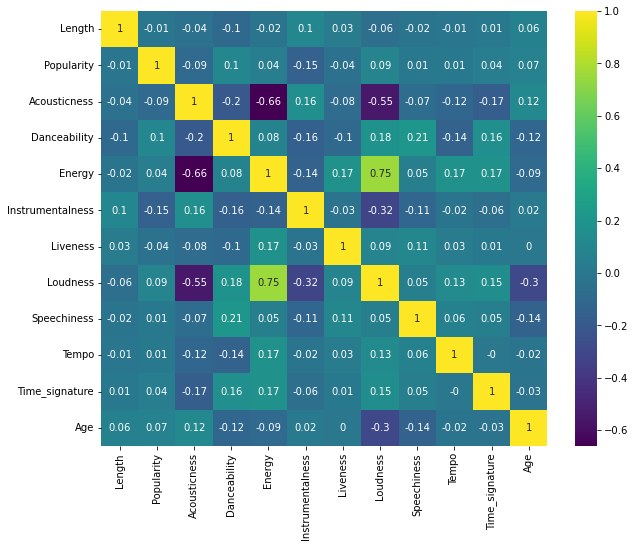

In [16]:
covMatrix = np.cov(df_scaled, rowvar = False)
covMatrix = pd.DataFrame(covMatrix,index= df.columns, columns = df.columns)
plt.figure(figsize = (10,8))
sns.heatmap(covMatrix.round(2), annot =True, cmap='viridis')
plt.show()

In [17]:
# Applying PCA to remove less important variables with least weightage and volume of data
pca = PCA()
pca.fit(df_scaled)
print(pca.explained_variance_)      #Eigenvalues

[2.67412213 1.370969   1.15680975 1.07087056 1.05218435 0.96056383
 0.91226742 0.80511159 0.79283308 0.61490286 0.41450737 0.1749031 ]


In [18]:
print('Eigenvectors')
Eigen_vectors = pd.DataFrame(pca.components_.round(4), index= df.columns, 
             columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'])
Eigen_vectors

Eigenvectors


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Length,0.0468,-0.0959,0.4811,-0.2037,-0.5146,0.2395,-0.1019,-0.5317,-0.1284,-0.1232,-0.1845,0.1864
Popularity,0.2831,-0.2380,-0.1322,-0.5867,0.2684,0.2888,0.2908,0.0846,-0.3000,0.3450,-0.1635,0.1359
Acousticness,-0.1214,-0.5439,0.1058,0.0405,-0.0710,0.1988,0.2689,-0.0143,0.4824,0.0812,-0.1175,-0.5536
Danceability,0.4774,-0.2700,-0.1583,0.2085,0.0598,0.4254,-0.1879,-0.0137,-0.1672,-0.4209,0.4418,-0.1016
Energy,0.4237,0.2053,0.0155,0.0498,-0.0459,-0.1020,0.5787,-0.1760,0.4863,-0.0512,0.2079,0.3390
Instrumentalness,0.3053,0.2242,-0.0253,0.0339,-0.0959,0.1846,-0.4828,-0.0948,0.2985,0.6704,0.1346,-0.1131
Liveness,0.5204,0.2506,-0.0593,0.0134,-0.0330,-0.1078,-0.0784,0.1192,0.0319,-0.2700,-0.6757,-0.3147
Loudness,0.0724,-0.5386,-0.1796,0.2804,0.1166,-0.1446,-0.2806,-0.0349,0.2077,0.0476,-0.3485,0.5591
Speechiness,0.3179,-0.3406,0.2045,-0.2271,-0.1674,-0.7167,-0.1002,0.0781,-0.1338,0.0752,0.2845,-0.1651
Tempo,0.1222,-0.0528,0.0236,0.6377,-0.1820,-0.0201,0.3625,-0.0703,-0.4905,0.3858,-0.0973,-0.0799


In [19]:
print('percentage of variation explained by each eigen Vector')
pca_variance_ratio = pca.explained_variance_ratio_
print(pca_variance_ratio)

percentage of variation explained by each eigen Vector
[0.22284267 0.11424699 0.09640045 0.08923888 0.0876817  0.08004669
 0.076022   0.06709238 0.06606917 0.05124171 0.03454215 0.0145752 ]


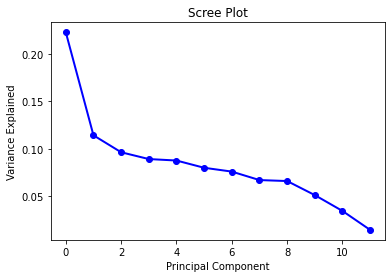

In [20]:
plt.plot(pca_variance_ratio, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Text(0, 0.5, 'cumulative explained variance')

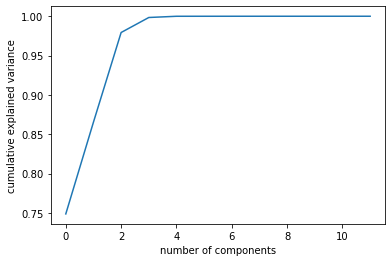

In [21]:
pca = PCA()
pca.fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [22]:
def pca_variance_ratio_percentage(i):
    pca = PCA(n_components=i)
    components = pca.fit_transform(df)

    total_var = pca.explained_variance_ratio_.sum() * 100
    return total_var

Number_of_Components = [x for x in range(1,13)]
Percentage_Variance = []
for i in range(1,13):
    percentage = pca_variance_ratio_percentage(i)
    Percentage_Variance.append(percentage)

In [23]:
values = {'Number_of_Components':Number_of_Components,
         'Percentage_Variance':Percentage_Variance}
values = pd.DataFrame(values)
print(values.to_string(index=False))

 Number_of_Components  Percentage_Variance
                    1            74.874941
                    2            86.542791
                    3            97.933744
                    4            99.840996
                    5            99.996360
                    6            99.997884
                    7            99.998642
                    8            99.999081
                    9            99.999440
                   10            99.999720
                   11            99.999883
                   12           100.000000


- Hence, 4 components consists of 99.8% (approx.) variance.